In [11]:
from helpers_merging import *

initial_power = 50* si.uW
initial_waist = 1.1*si.um
initial_distance = 3*si.um

trap: DoubleTweezer = DoubleTweezer(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer1 = initial_power,     #stationary
    power_tweezer2 = initial_power,     #transfer tweezer
    waist_tweezer1 = initial_waist,     #stationary
    waist_tweezer2 = initial_waist,     #transfer tweezer
    distance_tweezers = initial_distance,

    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

x, y, z = trap.x, trap.y, trap.z


omega_z1 = sp.sqrt(4*trap.power_tweezer1*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer1**3
omega_z2 = sp.sqrt(4*trap.power_tweezer2*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer2**3

omega_r1 = sp.sqrt(2*trap.power_tweezer1*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer1**2
omega_r2 = sp.sqrt(2*trap.power_tweezer2*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer2**2

print(f"omega_r1: {float(trap.subs(omega_r1)/2/np.pi):.1f}Hz, omega_r2: {float(trap.subs(omega_r2)/2/np.pi):.1f}Hz")
print(f"omega_z1: {float(trap.subs(omega_z1)/2/np.pi):.1f}Hz, omega_z2: {float(trap.subs(omega_z2)/2/np.pi):.1f}Hz")
print(f"eta = {float(trap.subs(omega_r1/omega_z1))}")

P_spacing = np.pi*trap.waist_tweezer1**2*const.hbar*omega_z1/2/trap.a

omega_r1: 2126.5Hz, omega_r2: 2126.5Hz
omega_z1: 231.5Hz, omega_z2: 231.5Hz
eta = 9.186412090177072


In [2]:
print(float(trap.subs(omega_z1/2/np.pi)))
print(float(trap.subs(omega_r1/2/np.pi)))
print(float(trap.subs(P_spacing/si.uW))) 

231.48079178308387
2126.4779442798836
0.5214842143140083


In [3]:
const.hbar * float(trap.subs(omega_z1))

1.5338079647322577e-31

In [4]:
const.hbar * float(trap.subs(omega_r1))

1.40901920312263e-30

In [5]:
#make sure the powers and waists are set correctly
trap[trap.power_tweezer1] = initial_power
trap[trap.power_tweezer2] = initial_power+0.4*P_spacing

trap[trap.waist_tweezer1] = initial_waist
trap[trap.waist_tweezer2] = initial_waist

#calculate eigenenergies
distances = np.linspace(initial_distance,0.1*si.um,500)
energies, states, potentials = loop_distances_3D(trap, distances,n_levels=12)



c:\Users\naeve\FerDy-Repo\merging_tweezer_code\fermions\helpers_merging.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  states[i,:len(ener)] = state


In [6]:
np.save("test_dist.npy", distances)
np.save("test_energies.npy", energies)
np.save("test_states.npy", states)

In [7]:
distances = np.load("test_dist.npy")
energies = np.load("test_energies.npy")
states = np.load("test_states.npy")

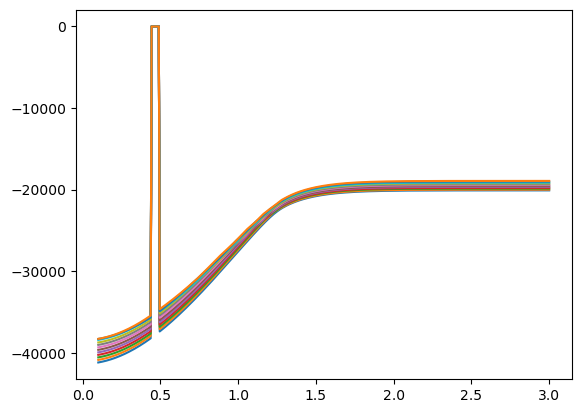

In [8]:
plt.plot(distances/si.um, energies/const.h)
#plt.xlim(0.5,3)
#plt.ylim(-60000,-40000)

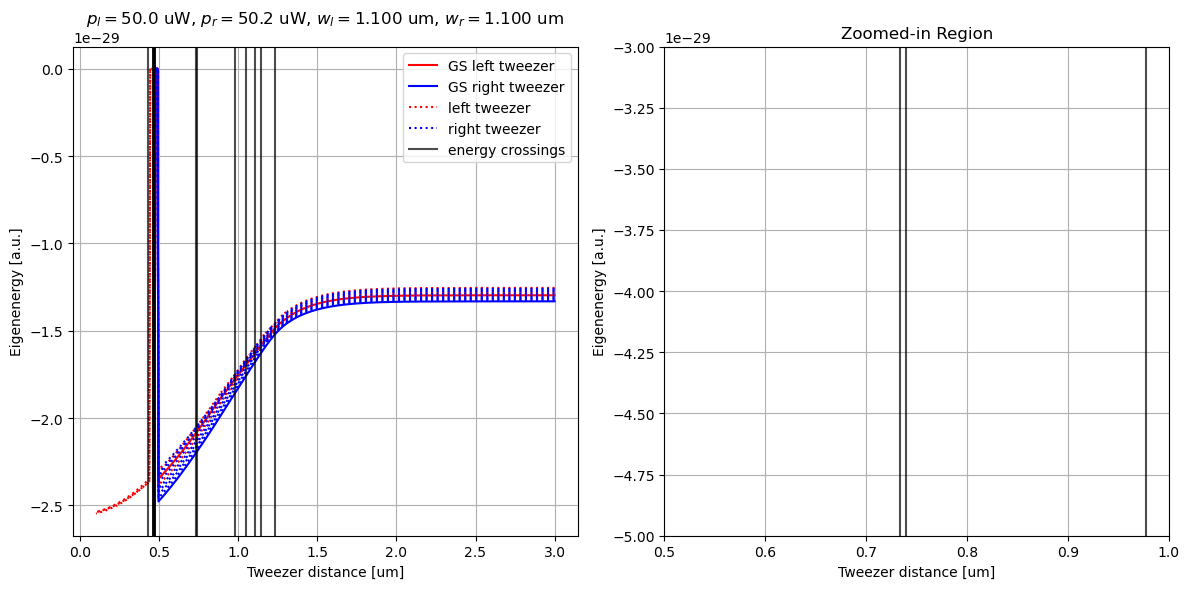

In [10]:
new_energies, new_states, new_potentials, index_top, index, swap_index = swapped_loop_distance_3D(distances, energies, states, potentials)
energies_left, energies_right, states_left, states_right,deltaE_min, occ_num = find_ass_tweezer_3D(new_energies,new_states)

# Create the figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the full range on ax1
ax1.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
ax1.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
ax1.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
ax1.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

for i, ind in enumerate(index):
    ax1.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

ax1.set_xlabel("Tweezer distance [um]")
ax1.set_ylabel("Eigenenergy [a.u.]")
ax1.set_title(fr"$p_l={float(trap.subs(trap.power_tweezer1))/si.uW:.1f}$ uW, $p_r={float(trap.subs(trap.power_tweezer2))/si.uW:.1f}$ uW, $w_l={float(trap.subs(trap.waist_tweezer1))/si.um:.3f}$ um, $w_r={float(trap.subs(trap.waist_tweezer2))/si.um:.3f}$ um")
ax1.grid()

# Plot the zoomed-in range (1 to 1.5 µm) on ax2
ax2.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
ax2.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
ax2.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
ax2.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

for i, ind in enumerate(index):
    ax2.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

ax2.set_xlabel("Tweezer distance [um]")
ax2.set_ylabel("Eigenenergy [a.u.]")
ax2.set_title("Zoomed-in Region")
ax2.set_xlim(0.5, 1)  # Zooming in on the region between 1.0 and 1.5 µm
ax2.set_ylim(-5e-29,-3e-29)
ax2.grid()

# Remove duplicates in the legend (labels that appear in both subplots)
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax1.legend(unique_labels.values(), unique_labels.keys())

# Show the plots
plt.tight_layout()
plt.show()